# Milestone 1 Assignment - Capstone Proposal

## Author - Studentname

### Capstone Project Instructions
Select a problem and data sets of particular interest and apply the analytics process to find and report on a solution.

Students will construct a simple dashboard to allow a non-technical user to explore their solution. The data should be read from a suitable persistent data storage, such as an Internet URL or a SQL data base.

The process followed by the students and the grading criteria include:
<ol style="list-style-type: lower-alpha;">
<li>Understand the business problem <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Evaluate and explore the available data <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span></li>
<li>Proper data preparation <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Exploration of data and understand relationships <span class="label" style="border-radius: 3px; background-color: darkcyan; color: white;">Milestone 1</span> <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span></li>
<li>Perform basic analytics and machine learning, within the scope of the course, on the data.  <span class="label" style="border-radius: 3px; background-color: royalblue; color: white;">Milestone 2</span> <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span> <BR/>For example, classification to predict which employees are most likely to leave the company.</li>
<li>Create a written and/or oral report on the results suitable for a non-technical audience. <span class="label" style="border-radius: 3px; background-color: slateblue; color: white;">Milestone 3</span></li>
</ol>




## Tasks
For this proposal, you are to:
1. Generate or describe a solvable business problem and outline the flow of data needed to address the problem.
2. Identify 2 or more available data sets
3. Report on the statistics of each data set to include: type, unique values, missing values, quantile statistics, descriptive statistics, most frequent values, and histogram. Include analysis statements based on results.
4. Perform data preparation based on analysis of the quality of the available data include concatenation method, imputation method(s), dealing with outliers, and binning/scaling transformation.
5. Output the resulting data into a new data file
6. Identify potential machine learning model(s)


## Problem Definition



Changing lifestyles around the world has immensely impacted human health. Especially in the USA, problems around obesity are on the rise and thus, the government has been keeping track of obesity and food environment index in order to track the progress of the measures taken in that direction. This project will predict if the measures taken so far have had any effect on the Country's health by estimating the obesity from the food environment index values.

In order to do that, we need two datasets from the USA government website, "datausa", namely last 5 years of data of adult obesity in USA and last 5 years of data of the food environment index. This historical data will be used for training the machine learning model to predict the food environment index in 2018 based on the obesity and food environment index data for the previous years.

## Data Sets

The two data sources for this task are:
1. First dataset on adult obesity: https://datausa.io/visualize?groups=0-Z1X72Pg&measure=Z1iORxu
2. Second dataset on food environment index: https://datausa.io/visualize?groups=0-Z1X72Pg&measure=Z1xNbvc

## Profile Reports & Analysis Statements

In [225]:
# Import libraries
import pandas as pd
import os
import pandas_profiling
from sklearn import preprocessing
import numpy as np

Assuming that the code and the data files exist in the same location:

In [226]:
current_dir = os.getcwd()

# Loading the datasets
obesity = pd.read_csv(current_dir + "/Data_USA_Obesity.csv", sep=',', header=0)
fei = pd.read_csv(current_dir + "/Data_USA_FEI.csv", sep=',', header=0)

In [227]:
obesity.head()

,ID Geography,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018)
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308


In [228]:
fei.head()

,ID Geography,Geography,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018)
0,05000US56045,"Weston County, WY",8.445,8.1,8.0,8.0,8.1
1,05000US36113,"Warren County, NY",8.817,8.3,8.1,8.1,8.4
2,05000US01001,"Autauga County, AL",7.445,7.2,7.1,6.9,7.1
3,05000US36115,"Washington County, NY",8.944,8.4,8.1,8.2,8.3
4,05000US36111,"Ulster County, NY",8.514,8.1,7.9,8.1,8.1


In [229]:
# Merge the two datasets based on the countys and remove one of the ID columns
obesity_fei_df = pd.merge(obesity, fei, on=['Geography'], how='inner')
obesity_fei_df.head()

,ID Geography_x,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),ID Geography_y,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018)
0,05000US20201,"Washington County, KS",0.341,0.334,0.320,0.307,0.312,05000US20201,7.128,6.8,6.6,6.6,7.1
1,05000US56045,"Weston County, WY",0.313,0.288,0.294,0.292,0.320,05000US56045,8.445,8.1,8.0,8.0,8.1
2,05000US01001,"Autauga County, AL",0.305,0.313,0.309,0.341,0.364,05000US01001,7.445,7.2,7.1,6.9,7.1
3,05000US36119,"Westchester County, NY",0.172,0.178,0.196,0.203,0.208,05000US36119,9.085,8.8,8.9,9.0,9.2
4,05000US36115,"Washington County, NY",0.283,0.290,0.298,0.319,0.308,05000US36115,8.944,8.4,8.1,8.2,8.3


In [230]:
# Summary Statistics
pandas_profiling.ProfileReport(obesity_fei_df)

Number of variables,13
Number of observations,3142
Total Missing (%),0.0%
Total size in memory,306.8 KiB
Average record size in memory,100.0 B
Numeric,2
Categorical,0
Boolean,0
Date,0
Text (Unique),3
Rejected,8


The Profile Report of the dataset shows that there is 0.2% missing data in some of the variables which needs to be taken care of. The obesity values are highly correlated with each other and so are the food environment index values. This implies that values do not vary a lot over five years. Except the two ID variables and the Geography feature, all the other features are numeric. But, we will need to take care of the missing values and see if there are any outliers in the numeric columns before we move forward.

## Data Preparation



In [231]:
# Checking null values
len(obesity_fei_df[obesity_fei_df.isna().any(axis=1)])

26

The number of rows with missing values is only 0.8% of the total data and hence, can be removed.

In [232]:
# Removing null/missing values
obesity_fei_df = obesity_fei_df.dropna()

After taking care of the null values, it's time to look at the outliers or anomalies in the dataset.

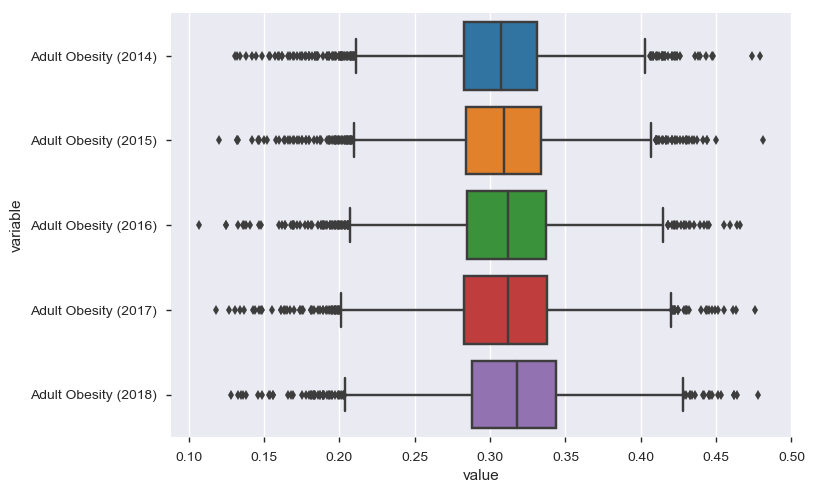

In [233]:
# Outlier detection
import seaborn as sns
sns.boxplot(x="value", y="variable", data=pd.melt(obesity_fei_df.iloc[:,2:7]))

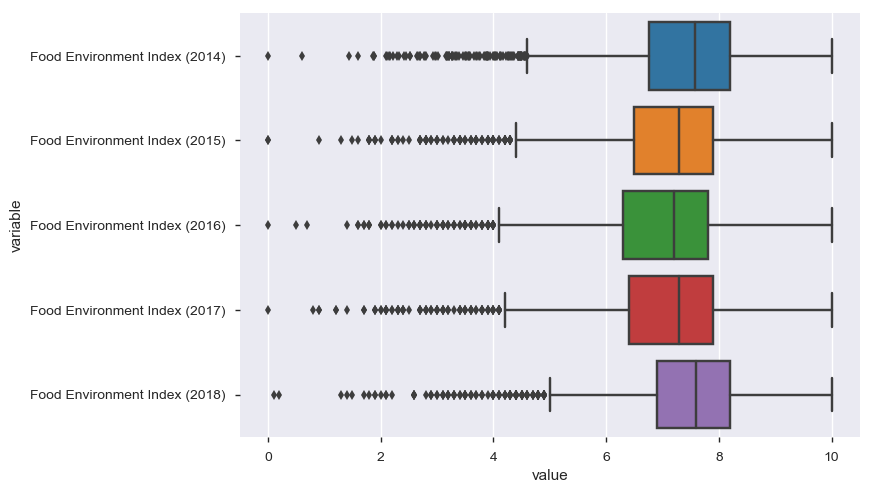

In [234]:
sns.boxplot(x="value", y="variable", data=pd.melt(obesity_fei_df.iloc[:, 8:13]))

As can be seen, the outliers comprise of a not-so-small percentage of the total data set. Removing these outliers would mean losing a lot of information and is thus, not recommended. Thus, we will use a model that deals with outliers without losing on any information. 

Additionally, notice that the scale of the values under Adult Obesity and the values under Food Environment Index differs by a factor of 10. We need to have all the features on the same scale to make sure each feature is equally important and that none of them dominates. Hence, we will use min-max scaler to scale the features.

In [235]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = obesity_fei_df.select_dtypes(include=float).columns
obesity_fei_df[numeric_cols] = pd.DataFrame(scaler.fit_transform(obesity_fei_df[numeric_cols]),index=obesity_fei_df.index)
obesity_fei_df.head()

,ID Geography_x,Geography,Adult Obesity (2014),Adult Obesity (2015),Adult Obesity (2016),Adult Obesity (2017),Adult Obesity (2018),ID Geography_y,Food Environment Index (2014),Food Environment Index (2015),Food Environment Index (2016),Food Environment Index (2017),Food Environment Index (2018)
0,05000US20201,"Washington County, KS",0.603448,0.592798,0.593315,0.527933,0.525714,05000US20201,0.7128,0.68,0.66,0.66,0.707071
1,05000US56045,"Weston County, WY",0.522988,0.465374,0.520891,0.486033,0.548571,05000US56045,0.8445,0.81,0.80,0.80,0.808081
2,05000US01001,"Autauga County, AL",0.500000,0.534626,0.562674,0.622905,0.674286,05000US01001,0.7445,0.72,0.71,0.69,0.707071
3,05000US36119,"Westchester County, NY",0.117816,0.160665,0.247911,0.237430,0.228571,05000US36119,0.9085,0.88,0.89,0.90,0.919192
4,05000US36115,"Washington County, NY",0.436782,0.470914,0.532033,0.561453,0.514286,05000US36115,0.8944,0.84,0.81,0.82,0.828283


Now that the missing values are removed and outliers are dealt with, it's time to save the dataframe into a CSV file that can be later used for analysis and machine learning purposes.

## Code Output

In [236]:
with open("obesity_fei_scaled.csv", "w+") as obesity_fei_scaled:
    obesity_fei_df.to_csv(obesity_fei_scaled)

## Machine Learning Model(s)

As we saw, almost all the variables contain outliers. The outliers aren't small enough to be removed and other methods to deal with outliers like binning the variables can lead to loss of information. Hence, we will use a model-based method to handle outliers. Instead of using linear models to predict the adult obesity, we will use tree-based modeling methods since they are more robust to outliers.